## **Problem Statement:**

You are tasked with developing a predictive model to estimate the median value of owner-occupied homes (MEDV) in various neighborhoods of Boston. To achieve this, you will use the Boston Housing dataset, which contains various features describing different aspects of the neighborhoods.

**Dataset Description:**

The Boston Housing dataset includes the following features:

1. CRIM: Per capita crime rate by town.
2. ZN: Proportion of residential land zoned for large lots.
3. INDUS: Proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. NOX: Nitrogen oxide concentration (parts per 10 million).
6. RM: Average number of rooms per dwelling.
7. AGE: Proportion of owner-occupied units built before 1940.
8. DIS: Weighted distance to employment centers.
9. RAD: Index of accessibility to radial highways.
10. TAX: Property tax rate.
11. PTRATIO: Pupil-teacher ratio.
12. B: Proportion of residents of African American descent.
13. LSTAT: Percentage of lower status population.

**Objective:**

Your objective is to build a simple linear regression model that predicts the median value of homes (MEDV) based on a single feature, specifically the average number of rooms per dwelling (RM). The goal is to create a model that accurately estimates the MEDV using the RM feature.

**Tasks:**

1. Load the Boston Housing dataset from the provided source.

2. Preprocess the dataset by selecting the RM feature as the independent variable (X) and the MEDV as the dependent variable (y).

3. Split the dataset into training and testing sets (e.g., 80% for training and 20% for testing) to evaluate the model's performance.

4. Develop a simple linear regression model using the training data, where you predict MEDV based on RM.

5. Evaluate the model's performance on the testing data using various metrics such as RMSE, MAE, MAPE, R², and Adjusted R².

6. Visualize the model's predictions by plotting the regression line against the actual data points.

Boston Housing Dataset Link: https://drive.google.com/file/d/1OULf9w4ztck9TLdvEIqr37AwUmrZ6En-/view?usp=sharing

### **Load and Pre-process your data:**

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("Boston_Housing.csv")

# Print the data
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Display the head and tail of data
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
# Print the shape of the data
df.shape

(506, 15)

### **Summary of the Data:**

In [ ]:
# summary statistics
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# information of null/non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


**The .info() method shows us that there are no null values present in the data.**

In [ ]:
# check for missing values
df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

**We can observe from the above that there are no missing values or duplicate values in this set of data.**

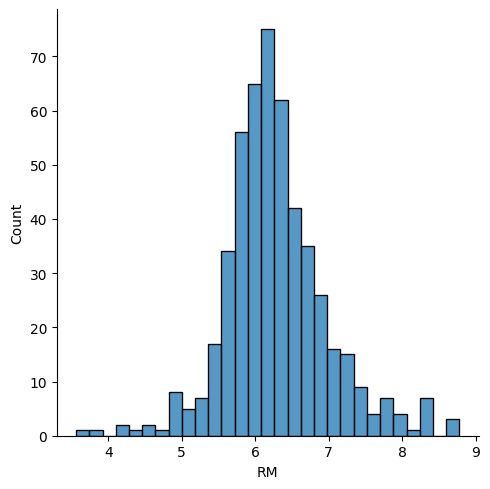

In [ ]:
# distribution of the independent variable
import seaborn as sns
sns.displot(df['RM'])

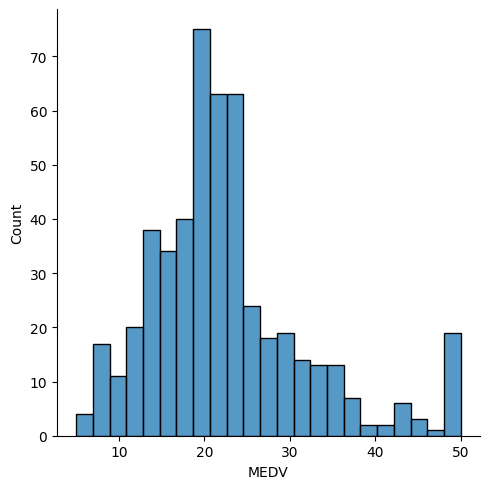

In [ ]:
# distribution of the dependent variable
import seaborn as sns
sns.displot(df['MEDV'])

<Axes: >

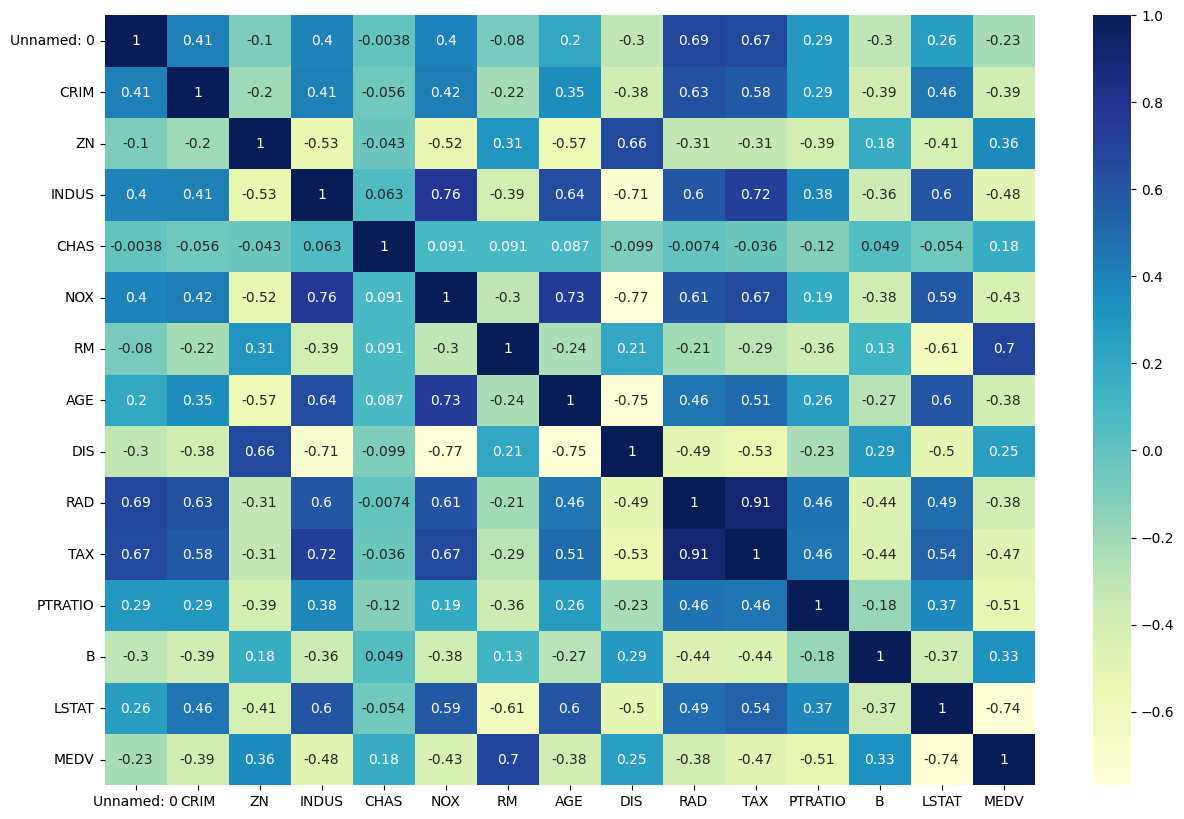

In [ ]:
# Correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True, cmap='YlGnBu')

Text(0, 0.5, 'MEDV')

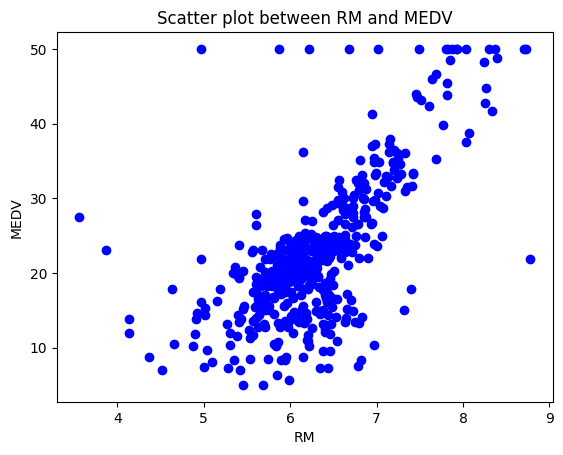

In [ ]:
# plot between RM and MEDV columns
plt.scatter(df['RM'], df['MEDV'], color='blue')
plt.title('Scatter plot between RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

#### For simplification purpose we are selecting the RM feature as the independent variable (X) and the MEDV as the dependent variable (y).

#### We are going to implement a simple linear regression where there is only one independent variable and one dependent variable. In case of multiple linear regression we can consider "n" number of independent variables but for the sake of simplicity and understanding we are proceeding with an example of simple linear regression.

#### In this example we are going to use the feature "Average Number of Rooms per Dwelling" to estimate or predict the "Median Value".

In [ ]:
# Selecting the 'RM' feature for simple linear regression
X = df[['RM']]
y = df['MEDV']

#### Split the dataset into training and testing sets (e.g., 80% for training and 20% for testing) to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Shape of training data
print(X_train.shape)
print(y_train.shape)

(404, 1)
(404,)


In [ ]:
# Training data
print(X_train)
print("----------")
print(y_train)

        RM
477  5.304
15   5.834
332  6.031
423  6.103
19   5.727
..     ...
106  5.836
270  5.856
348  6.635
435  6.629
102  6.405

[404 rows x 1 columns]
----------
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64


In [ ]:
# Shape of testing data
print(X_test.shape)
print(y_test.shape)

(102, 1)
(102,)


In [ ]:
# Testing data
print(X_test)
print("------------")
print(y_test)

        RM
173  6.416
274  6.758
491  5.983
72   6.065
452  6.297
..     ...
412  4.628
436  6.461
411  6.657
86   6.015
75   6.286

[102 rows x 1 columns]
------------
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


### **Linear Regression Implementation:**

### **Train the Model:**

#### Develop a simple linear regression model using the training data, where you predict MEDV based on RM.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculating MSE without using libraries
squared_diff = sum((y_test - y_pred)**2)
n = len(y_test)

mse = (squared_diff) / n
print("Mean Squared Error:", mse)

Mean Squared Error: 46.144775347317264


**The same thing we will be doing with the scikit-learn library:**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 46.144775347317264


In [ ]:
# Evaluate the model
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 6.79


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 4.48


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)*100

print(f"MAPE: {mape:.2f}%")

MAPE: 25.21%


#### **Visualize the model's predictions by plotting the regression line against the actual data points:**

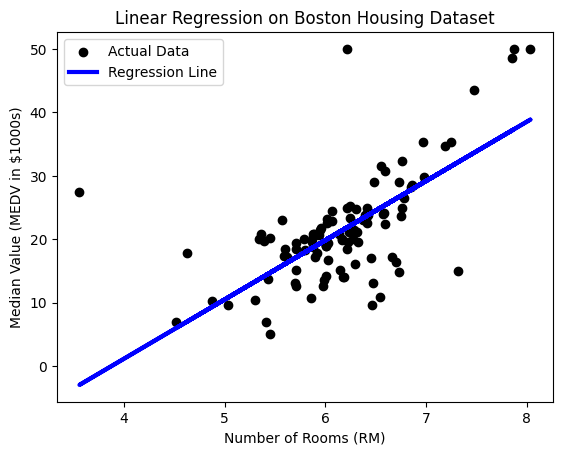

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV in $1000s)')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()